In [272]:
import numpy as np
import random
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [210]:
def create_dataset(num_points, variance, corr = False):
    ys = []
    correlation_value = 0
    for i in range(num_points):
        value = random.randrange(-variance, variance)
        if corr == True:
            if value >= 0:
                correlation_value += 2
            else:
                correlation_value -= 2
            value += correlation_value
        else:
            value = random.randrange(-variance, variance)
        ys.append(value)
    xs = [i for i in range(len(ys))]
    dataset = pd.DataFrame(np.array(ys, dtype = np.float64), np.array(xs, dtype = np.float64))                                            
    return dataset

In [254]:
dataset = create_dataset(200, 30, corr = True)

<Axes: >

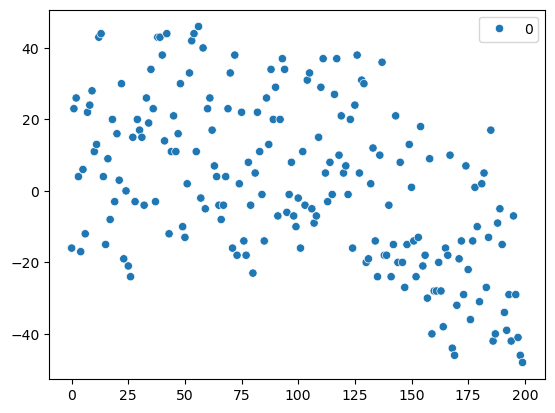

In [256]:
sns.scatterplot(dataset)

In [274]:
model = RandomForestRegressor()
